Adrian deCola

C Lab

PHYS 231

Due October 1, 2021


In [1]:
from google.colab import drive
from matplotlib import pyplot as plt
import statistics as stats
import numpy as np
import pandas as pd

# Deriving an Expression for the Speed of Light, $c$ 
 Looking at Figure 1.1 in the Lab Notebook, we can derive an expression for the speed of the laser, or the speed of light, using the angular frequency of the rotating mirror, $\omega$, the length the laser travels before between the rotating and return mirror, $L$, and the displacement angle of the laser (the optical angle), $\theta_o$. 

   $\omega$ is constant: $\omega=\frac{\theta_m}{t'}$, where $\theta_m$ is the mechanical angle, or the angel the mirror rotates before the laser returns to it and $t$ is the time it takes for the laser to return to the rotating mirror. 

  Since the laser travels at the speed of light (a constant), $c$, $c=\frac{2L}{t'}$ or $t'=\frac{2L}{c}$. 

  Figure 3.1. shows that the optical angle, the angle at which the laser was displaces is twice the mechanical angle, in agreement with theory. Therefore, $\theta_o=2\theta_m$ or $\frac{1}{2}\theta_o=\theta_m$. 

  Substituting $\theta_m$ and $t'$ into our $\omega$ expression:
\begin{align}
\omega &= \frac{\frac{1}{2}\theta_o}{\frac{2L}{c}} \\
\omega &= \frac{\theta_oc}{4L} \\
c &= \frac{4\omega L}{\theta_o}
\end{align}

  Figure 3.2. is demonstrates the relationship between the optical angle, $\theta_o$, the focal length, $f$, and the displacement seen in the telescope, $d$. 
  $$tan(\theta_o)= \frac{d}{f}$$
  Using the small angle approximation, which works for our experiment as the displacement was significantly under $10^{\circ}$, 
  $$tan(\theta_o)\approx\theta_o=\frac{d}{f}$$

Therefore; 
$$c = \frac{4\omega fL}{d}$$
As explained in the set-up, we will only measure changes in frequency and displacement. 
$$c = \frac{4\Delta\omega fL}{\Delta d}$$
We would also like to convert angular frequency to frequency, we will use $F$ to denote the frequency adn the focal length is already denoted by $f$:
$$\omega = 2\pi F$$
$$c = \frac{8\pi\Delta F fL}{\Delta d}$$

  This relationship is the one we will use to measure the speed of light, $c$. 

# Calculating the focal length, $f$
    Note: All calculations will always be shown in a python cell below. 

  The focal length equation gives: 
  $$\frac{1}{f}=\frac{1}{d_o}+\frac{1}{d_i}$$
  where $d_o$ is the objects distance from the lense and $d_i$ is the image distance from the lense. One definition of magnefication, $M$, gives:
\begin{align}
M&=\frac{S_i}{S_o}=\frac{d_i}{d_o} \\
d_i&=d_oM\\
\end{align}
  where $S_i$ is the size of the image and $S_o$ is the size of the objects, as the image distances are proportional to their sizes. 
\begin{align}
\frac{1}{f}&=\frac{1}{d_o}+\frac{1}{d_i}\\
\frac{1}{f}&=\frac{1}{d_o}+\frac{1}{Md_o}\\
\frac{1}{f}&=\frac{M}{Md_o}+\frac{1}{Md_o}\\
\frac{1}{f}&=\frac{1+M}{Md_o} \\
f&=\frac{d_oM}{1+M} \\
\end{align}

  We will use an the size of the image and the size of the object to calculate the magnefication constant. The uncertainty and length measurements raw data show that:
\begin{align}
S_o&=13.2\pm.1 cm \\
S_o&=.132\pm.001 m
\end{align}
Weighting our measurements for $S_i$, $(0.091\pm0.005)in$ and $(0.089\pm0.005)in$ by their uncertainties gives the average as the uncertainty is the same. 
$$S_{i, best}=0.09 in$$
To calculate the resulting uncertainty:
$$\sigma_{S_i} =\left( \sqrt{\sum_i{\frac{1}{\sigma_i^2}}} \right)^{-1}$$
$$\sigma_{S_i}=0.004 in$$
$$S_i=(0.09\pm0.004)in=(2.3\pm0.1)*10^{-3}m$$
 Getting a value for $M$:
\begin{align}
M_{best} &= \frac{S_{i,best}}{S_{o,best}}\approx0.01731 \\
\sigma_M&=\sqrt{\sum_i\left( \frac{\partial M}{\partial p_i}\right)^2\sigma_{p_i}^2}
\end{align}
where $p_i$ are the variables with uncertainty in the expression for magnefication and $\sigma_{p_i}$ are their uncertainties. 
\begin{align}
\sigma_M&=\sqrt{\sum_i\left(\frac{\partial M}{\partial p_i}\right)^2\sigma_{p_i}^2}\\
&=\sqrt{\frac{1}{S_o^2}\sigma_{S_i}^2+(\frac{-S_i}{S_o^2})^2\sigma_{S_o}^2}\\
\sigma_M&=0.0007\\
M&=0.0173\pm0.0007
\end{align}
The same process can be applied to get the objects distance from the lense, $d_o$: $d_{o,best}=T_{best}*l_{T, best}$ where $T$ is the number of tiles and $l_T$ is the length per tile.

\begin{align}
d_{o,best}&=24.32m \\
\sigma_{d_o}&=\sqrt{\sum_i\frac{\partial^2 d_o}{\partial p_i^2}\sigma_{p_i}^2}\\
&=\sqrt{T^2\sigma_{l_T}^2+l_T^2\sigma_{T}^2}\\
\sigma_{d_o}&=60cm=.6m\\
d_o&=24.3\pm0.6m
\end{align}
We can combine our expressions for $d_o$ and $M$, using the same process again, to get a value for $f$, the focal length. 
\begin{align}
f_{best}&=\frac{d_{o,best}M_{best}}{1+M_{best}} \\
f_{best}&\approx0.413m\\
\sigma_{f}&=\sqrt{\sum_i\left( \frac{\partial f}{\partial p_i}\right)^2\sigma_{p_i}^2}\\
&=\sqrt{\left(\frac{M}{1+M}\sigma_{d_o}\right)^2+\left(\frac{d_o}{(1+M)^2}\sigma_M\right)^2}\\
\sigma_{f}&=0.02\\
f&=0.41\pm0.02m
\end{align}

In [2]:
# assigning measurements to variables
S_o_best = 0.132
S_o_unc = 0.001
S_i_1_in = 0.091
S_i_1_unc_in = 0.005
S_i_2_in = 0.089
S_i_2_unc_in = 0.005
T_best = 80
T_unc = 2
l_T_best_cm = 30.4
l_T_unc_cm = 0.1



# calculating value and uncertainty for the size of image, S_i
S_i_best_in = (S_i_1_in + S_i_2_in) / 2
S_i_best = 0.0254 * S_i_best_in

S_i_unc_in = (np.sqrt(1/S_i_1_unc_in**2 + 1/S_i_2_unc_in**2))**-1
S_i_unc = 0.0254 * S_i_unc_in

print(f"The best value for S_i is: {S_i_best}m.\nThe uncertainty in this value is {S_i_unc}m.")



# calculating value and uncertainty for the magnefication, M
M_best = S_i_best / S_o_best
M_unc = np.sqrt( (S_i_unc/S_o_best)**2 + (-S_i_best*S_o_unc/(S_o_best)**2)**2 )

print(f"The best value for M is: {M_best}.\nThe uncertainty in this value is {M_unc}.")



# calculating value and uncertainty for object distance, d_o
d_o_best_cm = l_T_best_cm * T_best
d_o_best = 0.01 * d_o_best_cm

d_o_unc_cm = np.sqrt((T_best*l_T_unc_cm)**2 + (l_T_best_cm*T_unc)**2 )
d_o_unc = 0.01 * d_o_unc_cm

print(f"The best value for d_o is: {d_o_best}m.\nThe uncertainty in this value is {d_o_unc}m.")



# calculating value and uncertainty for the focal length, f
f_best = d_o_best * M_best / (1 + M_best)
f_unc = np.sqrt((M_best*d_o_unc/(1 + M_best))**2 + (d_o_best*M_unc/(1 + M_best)**2)**2)

print(f"The best value for f is: {f_best}m.\nThe uncertainty in this value is {f_unc}m.")

The best value for S_i is: 0.002286m.
The uncertainty in this value is 8.980256121069153e-05m.
The best value for M is: 0.017318181818181816.
The uncertainty in this value is 0.0006928575753288109.
The best value for d_o is: 24.32m.
The uncertainty in this value is 0.6132405726955776m.
The best value for f is: 0.41400831062061566m.
The uncertainty in this value is 0.01934084119145406m.


# Calculating L
  It is important to see the $L$ is the half of the length the laser travels before returning to the mirror. We will use $L_i$ to denote the length for $i$ passes. In the case of one pass through the basement of Carnegie, this is the length from the rotating mirror to the other side of Carnegie. This includes the lengths between the mirrors, $L_m$, and the length between the far mirrors in Carnegie basement, $L_b$. 
  
  Calculating $L_b$:
  $$L_b=T_b*l_T$$
  where $T_b$ is the number of tiles across the basement of Carnegie. 
\begin{align}
L_{b,best}&= T_{b,best}*l_{T,best}\\
L_{b,best}&=31.92m\\
\sigma_{L_b}&=\sqrt{\sum_i\left(\frac{\partial L_b}{\partial p_i}\right)^2\sigma_{p_i}^2}\\
&=\sqrt{T_b^2\sigma_{l_T}^2+l_T^2\sigma_{T_b}}\\
\sigma_{L_b}&=30cm=0.3m\\
L_b&=31.9\pm0.3m
\end{align}

Calculating $L_m$:

The lengths between all the mirrors were $2.3\pm0.1m$, $1.5\pm0.1m$, $1.6\pm0.1m$, and $1.6\pm0.1m$.
\begin{align}
L_{m,best}&=2.3+1.5+1.6+1.6=7.0m\\
\sigma_{L_m}&=\sqrt{\sum_i\left(\frac{\partial L_m}{\partial p_i}\right)^2\sigma_{p_i}^2}\\
&=\sqrt{\sum_i\sigma_{p_i}^2}\\
&=\sqrt{0.1^2 + 0.1^2 + 0.1^2 + 0.1^2} \\
\sigma_{L_m}&=0.2m\\
L_m&=7.0\pm0.2m
\end{align}
Calculating $L_1$:
\begin{align}
L_1 &= L_m + L_b\\
L_{1,best}&=38.9m\\
\sigma_{L_1}&=\sqrt{\sum_i\left(\frac{\partial L_1}{\partial p_i}\right)^2\sigma_{p_i}^2}\\
&=\sqrt{\sum_i\sigma_{p_i}^2}\\
\sigma_{L_1}&=0.4m\\
L_1&=38.9\pm0.4m
\end{align}

Calculating $L_2$:

For two passes only $L_b$, the length of the basement, is doubled:
\begin{align}
L_2&=L_m + 2L_b\\
L_{2,best}&=70.8m\\
\sigma_{L_2}&=\sqrt{\sum_i\left(\frac{\partial L_2}{\partial p_i}\right)^2\sigma_{p_i}^2}\\
&=\sqrt{\sigma_{L_m}^2+(2\sigma_{L_b})^2}\\
\sigma_{L_2}&=0.7m\\
L_2&=70.8\pm0.7m
\end{align}

Calculating $L_3$:

For three passes $L_b$, the length of the basement, is counted three times:
\begin{align}
L_3&=L_m +3L_b\\
L_{3,best}&=102.7m\\
\sigma_{L_3}&=\sqrt{\sum_i\left(\frac{\partial L_3}{\partial p_i}\right)^2\sigma_{p_i}^2}\\
&=\sqrt{\sigma_{L_m}^2+(3\sigma_{L_b})^2}\\
\sigma_{L_3}&=1m\\
L_3&=103\pm1m
\end{align}



In [ ]:
# assigning measurements to variables
L_m_best = 7
L_m_unc = 0.2
T_b_best = 105
T_b_unc = 1



# getting the length per tile, and its uncertainty, in meters
l_T_best = l_T_best_cm * .01
l_T_unc = .01 * l_T_unc_cm



# calculating value and uncertainty for the length of the basement, L_b
L_b_best = T_b_best * l_T_best
L_b_unc = np.sqrt((T_b_best * l_T_unc)**2 + (l_T_best * T_b_unc)**2)

print(f"The best value for L_b is: {L_b_best}m.\nThe uncertainty in this value is {L_b_unc}m.")



# calculating value and uncertainty for the length of one pass, L_1
L_1_best = L_b_best + L_m_best
L_1_unc = np.sqrt((L_b_unc)**2 + (L_m_unc)**2)

print(f"The best value for L_1 is: {L_1_best}m.\nThe uncertainty in this value is {L_1_unc}m.")



# calculating value and uncertainty for the length of two passes, L_2
L_2_best = 2*L_b_best + L_m_best
L_2_unc = np.sqrt((2*L_b_unc)**2 + (L_m_unc)**2)

print(f"The best value for L_2 is: {L_2_best}m.\nThe uncertainty in this value is {L_2_unc}m.")



# calculating value and uncertainty for the length of three passes, L_3
L_3_best = 3*L_b_best + L_m_best
L_3_unc = np.sqrt((3*L_b_unc)**2 + (L_m_unc)**2)

print(f"The best value for L_3 is: {L_3_best}m.\nThe uncertainty in this value is {L_3_unc}m.")

The best value for L_b is: 31.919999999999998m.
The uncertainty in this value is 0.32162244946520757m.
The best value for L_1 is: 38.92m.
The uncertainty in this value is 0.37873605584892495m.
The best value for L_2 is: 70.84m.
The uncertainty in this value is 0.6736200709598846m.
The best value for L_3 is: 102.75999999999999m.
The uncertainty in this value is 0.9853775926009277m.


# Calculating $c$ for each Measurement of a Change in Frequency and Displacement
First we will import the data. The assumption is that my folder "deCola" is in your drive not under any other folders. If it is not you can short cut it there and the script will still be able to read it. 

In [3]:
# mounting our data frame so that we can read the raw data from my folder
drive.mount('/content/drive')
data_path = "/content/drive/MyDrive/deCola/C Lab/Data/lab_c_freq_displacement_data.csv"
#data_path = "/content/drive/MyDrive/Courses/231/F2021/Student Work/deCola/C Lab/Data/lab_c_freq_displacement_data.csv"


# reading the file as a pandas dataframe
df = pd.read_csv(data_path)



# droping the empty column
df = df.drop(columns = 'Unnamed: 5')



""" 
    Here we are converting each column into a numpy array.
    Note: We do not care about the initial 'd' reading as we calculated 
    the displacement for each reading
"""
passes = df.iloc[:,0].values
f_i = df.iloc[:,1].values
f_f = df.iloc[:,3].values
delta_d = df.iloc[:,4].values



# converting the displacement, which is in centi-inches, to meters
delta_d = 0.000254 * delta_d



# creating up a numpy array for L and the uncertainty in L
L = [0 for i in range(len(passes))]
sigma_L = [0 for i in range(len(passes))]

for i in range(len(passes)):
  if passes[i] == 1:
    L[i] = L_1_best
    sigma_L[i] = L_1_unc
  if passes[i] == 2:
      L[i] = L_2_best
      sigma_L[i] = L_2_unc
  if passes[i] == 3:
    L[i] = L_3_best
    sigma_L[i] = L_3_unc

L = np.asarray(L)
sigma_L = np.asarray(sigma_L)



# creating up numpy arrays for the other nessesary quantities to calculate c
foc_len = [f_best for i in range(len(passes))]
foc_len = np.asarray(foc_len)

sigma_foc_len = [f_unc for i in range(len(passes))]
sigma_foc_len = np.asarray(sigma_foc_len)

sigma_d_in_centi_inches = [0.03 for i in range(len(passes))]
sigma_d_in_centi_inches = np.asarray(sigma_d_in_centi_inches)
sigma_d = (0.000254 * sigma_d_in_centi_inches).round(6)



# since the uncertianty in our meaurements were 2 Hz, the uncertainty in the 
# angular frequency, half of our measurements, is also half, or 1 Hz
sigma_f = [1 for i in range(len(passes))]
sigma_f = np.asarray(sigma_f)

MessageError: ignored

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Since the mirrors were double sided, the frequencies we read were twice the actual frequencies, we should divide them by 2. 
$$\Delta f = \frac{1}{2}(f_f - f_i)$$
\begin{align}
\sigma_{\Delta f}&=\sqrt{\sum_i\left(\frac{\partial \Delta f}{\partial p_i}\right)^2\sigma_{p_i}^2}\\
&=\sqrt{\left( \frac{1}{2}\sigma_{f_f} \right)^2+\left( \frac{-1}{2}\sigma_{f_i}\right)^2}\\
&= \sqrt{2}\\
&or\\
\sigma_{\Delta f}&=1
\end{align}

In [ ]:
delta_f = (f_f - f_i) / 2

# creating a numpy array for all the uncertainties in the change in frequencies
sigma_f = [np.sqrt(2) for i in range(len(passes))]
sigma_f = np.asarray(sigma_f)

    Note: We will will not/have not rounded any calculations except for the uncertainties for now, until we calculate values and uncertainties for the speed of light, c. 

As stated before, we will calculate $c$ values using the following equation:
$$c = \frac{8\pi\Delta F fL}{\Delta d}$$

In [ ]:
c = 8 * np.pi * delta_f * foc_len * L / delta_d

Now we must calculate the uncertainties in our $c$ values using the following equation:
\begin{align}
\sigma_{c}&=\sqrt{\sum_i\left(\frac{\partial c}{\partial p_i}\right)^2\sigma_{p_i}^2}\\
&= \sqrt{\left(\frac{\partial c}{\partial \Delta F}\sigma_{\Delta F}\right)^2 + \left(\frac{\partial c}{\partial f}\sigma_{f}\right)^2 + \left(\frac{\partial c}{\partial L}\sigma_{L}\right)^2 + \left(\frac{\partial c}{\partial \Delta d}\sigma_{\Delta d}\right)^2}\\
&= \sqrt{\left(\frac{8\pi fL}{\Delta d}\sigma_{\Delta F}\right)^2 +\left(\frac{8\pi \Delta F L}{\Delta d}\sigma_{f}\right)^2 + \left(\frac{8\pi \Delta F f}{\Delta d}\sigma_{L}\right)^2 + \left(\frac{-8\pi \Delta Ff L}{(\Delta d)^2}\sigma_{\Delta d}\right)^2}
\end{align}
Using our values:

In [ ]:
sigma_c = np.sqrt( (8*np.pi*foc_len*L*sigma_f/delta_d)**2 + (8*np.pi*delta_f*L*sigma_foc_len/delta_d)**2 + (8*np.pi*delta_f*foc_len*sigma_L/delta_d)**2 + (-8*np.pi*delta_f*foc_len*L*sigma_d/(delta_d)**2)**2 )

Graphing our results:

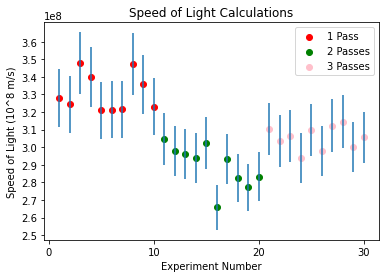

In [ ]:
# Creating an x axis
experiment = [i + 1 for i in range(len(passes))]



# Splitting arrays by passes so that we can color-code them
experiment_1 = experiment[0:10]
experiment_2 = experiment[10:20]
experiment_3 = experiment[20:30]

c_1 = c[0:10]
c_2 = c[10:20]
c_3 = c[20:30]



# Formatting Plot
plt.scatter(experiment_1, c_1, color = "r", label = "1 Pass")
plt.scatter(experiment_2, c_2, color = "g", label = "2 Passes")
plt.scatter(experiment_3, c_3, color = "pink", label = "3 Passes")
plt.errorbar(experiment, c, yerr=sigma_c, linestyle = '')
plt.legend()

plt.title("Speed of Light Calculations")
plt.xlabel("Experiment Number")
plt.ylabel("Speed of Light (10^8 m/s)")

plt.xticks(np.arange(0, 31, 10))
plt.yticks(np.arange(250000000, 360000001, 10000000))

plt.show()

# Looking for Outliers
Looking at the graph, we might expect the super low calculation for $c$ from the 2 passes experiment to be an outlier. We might also expect the two highest calculations for $c$ from the one pass experiment to be outliers. Before we continue, we should make sure that none of our data point are outliers. To do this, we will use Chauvenet's Criterion. It is important that to note that we will be treating all of the data as one dataset: the implications of this will be discussed in the Conclusion Section. It is also important to note that the mean we use is not a weighted average mean when calculting z scores.

The first thing we want to calculate is the mean and standard deviations of our calculation for $c$.



In [ ]:
c_mean = stats.mean(c)
c_std = stats.stdev(c)

print(f"The mean of our calculations for the speed of light is {c_mean}.")
print(f"The standard deviations of our calculations for the speed of light is {c_std}.")

The mean of our calculations for the speed of light is 308719171.241873.
The standard deviations of our calculations for the speed of light is 19894899.859023917.


Now we can calculate a z-score for each $c$ value. Looking at Chauvenet's Criterion Table, for sample size of 30, we should eliminate any calculations with a magnitude of a z-score more than 2.394, or an observation that is more that 2.394 standard deviations away from the mean. 

In [ ]:
z_score = (c - c_mean) / c_std
print(z_score)

[ 0.98179229  0.78736346  1.97105335  1.55653904  0.61208364  0.62940281
  0.64084339  1.9386114   1.36210731  0.71731666 -0.20164638 -0.54985215
 -0.64196239 -0.74264915 -0.32477943 -2.15772026 -0.77009205 -1.31853771
 -1.58070698 -1.27827123  0.08909723 -0.25852454 -0.10775439 -0.74883375
  0.06098764 -0.53888424  0.17252006  0.29103255 -0.43045669 -0.16007951]


Since no z_score is greater than 2.394 in magnitude, we cannot consider any of these observations outliers. 

# Comparing Sources of Error
It is suprising to see that our errors on did not go down with the number of passes. Reasons to this are discussed in the Conclusion section but in this section we find where most of our error is coming. We will use the following equation:
\begin{align}
1&= \frac{1}{\sigma_{c}^2}\left(\left(\frac{8\pi fL}{\Delta d}\sigma_{\Delta F}\right)^2 +\left(\frac{8\pi \Delta F L}{\Delta d}\sigma_{f}\right)^2 + \left(\frac{8\pi \Delta F f}{\Delta d}\sigma_{L}\right)^2 + \left(\frac{-8\pi \Delta Ff L}{(\Delta d)^2}\sigma_{\Delta d}\right)^2\right)\\
\end{align}
where the first term is the error from the frequency and the second term is the error from the focal length. This way we can get each error as a fraction of the total. 

In [ ]:
freq_error = (8 * np.pi * foc_len * L * sigma_f / (delta_d * sigma_c))**2
foc_error = (8 * np.pi * delta_f * L * sigma_foc_len / (delta_d * sigma_c))**2
L_error = (8 * np.pi * foc_len * delta_f * sigma_L / (delta_d * sigma_c))**2
d_error = (8 * np.pi * foc_len * delta_f * L * sigma_d / (delta_d**2 * sigma_c))**2



# getting an average proportion of each error
avg_freq_error = stats.mean(freq_error)
avg_foc_error = stats.mean(foc_error)
avg_L_error = stats.mean(L_error)
avg_d_error = stats.mean(d_error)

print(f"The average proportion of error from the frequency measurements was {round(avg_freq_error, 4)}.")
print(f"The average proportion of error from the focal length measurement calculation was {round(avg_foc_error, 4)}.")
print(f"The average proportion of error from the L measurement calculation was {round(avg_L_error, 4)}.")
print(f"The average proportion of error from the displacement measurements was {round(avg_d_error, 4)}.")

[0.00448706 0.00410747 0.0040313  0.00422858 0.00499786 0.00476794
 0.00425311 0.00408238 0.00417646 0.00428553 0.00561833 0.00458078
 0.0044708  0.00459392 0.00528776 0.0054136  0.00501412 0.00525589
 0.00465824 0.00508242 0.00435933 0.00507418 0.00472912 0.00428849
 0.00470617 0.00508871 0.00451694 0.00565827 0.00526188 0.00525935]
[0.86369951 0.87365115 0.86328695 0.86311596 0.85737984 0.86183061
 0.87214296 0.86242427 0.86633132 0.87069968 0.92532007 0.93284562
 0.93377789 0.93335679 0.92781794 0.93338893 0.93099094 0.93144953
 0.93548974 0.93226869 0.94409957 0.94214145 0.94309419 0.94551133
 0.94291255 0.94255014 0.94341487 0.93910821 0.94178859 0.94133689]
[0.03747639 0.03790819 0.03745849 0.03745107 0.03720217 0.03739529
 0.03784275 0.03742105 0.03759058 0.03778013 0.03833825 0.03865005
 0.03868868 0.03867123 0.03844175 0.03867256 0.03857321 0.03859221
 0.03875961 0.03862615 0.03977795 0.03969545 0.03973559 0.03983743
 0.03972793 0.03971267 0.0397491  0.03956765 0.03968058 0.03

 # Calculating a Weighted Average for $c$
 The weighted average value for all of our $c$ values is according to the following equation:
 $$c = \frac{\sum_i\frac{c_i}{\sigma_{c_i}^2}}{\sum_i\frac{1}{\sigma_{c_i}^2}}$$
 With an uncertainty according to the following equation:
 $$\sigma_c = \left( \sqrt{\sum_i\frac{1}{\sigma_{c_i}^2}}\right)^{-1}$$

In [ ]:
 # initializing
sum_c_over_svariance = 0
for i in range(len(c)):
  sum_c_over_svariance += c[i] / sigma_c[i]**2

sum_1_over_svariance = 0
for i in range(len(c)):
  sum_1_over_svariance += 1 / sigma_c[i]**2



c_weighted_avg = sum_c_over_svariance / sum_1_over_svariance
sigma_c_weighted_avg = (sum_1_over_svariance)**-.5
print(f"The weighted average value for c is {int(c_weighted_avg)}.")
print(f"Its error is {int(sigma_c_weighted_avg)}.")

The weighted average value for c is 305724668.
Its error is 2734028.


The weighted average value for $c$ is therefore:
$$c = (3.06 \pm0.03)*10^8\frac{m}{s}$$

# Calculating a Value for $c$ using the Spread Method
For this method we will first calculate values for $c$ within each pass group, with an error according to the standard error of the means. Then we will combine these three values with uncertainties in accordance with weighted average equation above. 

In [ ]:
c_1_mean = stats.mean(c_1)
c_2_mean = stats.mean(c_2)
c_3_mean = stats.mean(c_3)

c_1_err = stats.stdev(c_1) / np.sqrt(len(c_1)) * 1.06 # t correction
c_2_err = stats.stdev(c_2) / np.sqrt(len(c_2)) * 1.06
c_3_err = stats.stdev(c_3) / np.sqrt(len(c_3)) * 1.06

print(f"The mean of the first pass is {int(c_1_mean)}(meters per second) with an uncertainty {int(c_1_err)}(meters per second).")
print(f"The mean of the second pass is {int(c_2_mean)}(meters per second) with an uncertainty {int(c_2_err)}(meters per second).")
print(f"The mean of the third pass is {int(c_3_mean)}(meters per second) with an uncertainty {int(c_3_err)}(meters per second).")


# calculating the weighted average from each pass
sum_c_over_svariance2 = c_1_mean / c_1_err**2 + c_2_mean / c_2_err**2 + c_3_mean / c_3_err**2
sum_1_over_svariance2 = 1 / c_1_err**2 + 1 / c_2_err**2 + 1 / c_3_err**2

c_spread = sum_c_over_svariance2 / sum_1_over_svariance2
c_spread_err = (sum_1_over_svariance2)**-.5
print(f"The spread value for c is {int(c_spread)}.")
print(f"Its error is {int(c_spread_err)}.")

The mean of the first pass is 330995716(meters per second) with an uncertainty 3628052(meters per second).
The mean of the second pass is 289687276(meters per second) with an uncertainty 4087310(meters per second).
The mean of the third pass is 305474520(meters per second) with an uncertainty 2223656(meters per second).
The spread value for c is 308414437.
Its error is 1719876.


The $c$ value using the spread between pass groups and taking the weighted average is therefore:
$$c = (3.08 \pm0.02)*10^8\frac{m}{s}$$